<a href="https://colab.research.google.com/github/MiguelAngeloTr/Deep_Learning/blob/main/C1/Semana_5_Regresion_y_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema de regresión**

## Procesamiento del dataset --> Concrete Compressive Strength

[Concrete Compressive Strength Data Set](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
#https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

In [ ]:
data = pd.read_excel('/content/Concrete_Data.xls')
print(data.shape)
data.head(10)

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [ ]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
data['Cement (component 1)(kg in a m^3 mixture)']

,Cement (component 1)(kg in a m^3 mixture)
0,540.0
1,540.0
2,332.5
3,332.5
4,198.6
...,...
1025,276.4
1026,322.2
1027,148.5
1028,159.1


In [ ]:
data.columns = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Concrete compressive strength']
data.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [ ]:
data = data.rename(columns={'Cement':'cement'})
data.head(5)

,cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Verificar si existen valores nulos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
data.isnull().sum()

,0
cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Concrete compressive strength,0


array([[<Axes: title={'center': 'cement'}>,
        <Axes: title={'center': 'Blast Furnace Slag'}>,
        <Axes: title={'center': 'Fly Ash'}>],
       [<Axes: title={'center': 'Water'}>,
        <Axes: title={'center': 'Superplasticizer'}>,
        <Axes: title={'center': 'Coarse Aggregate'}>],
       [<Axes: title={'center': 'Fine Aggregate'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Concrete compressive strength'}>]],
      dtype=object)

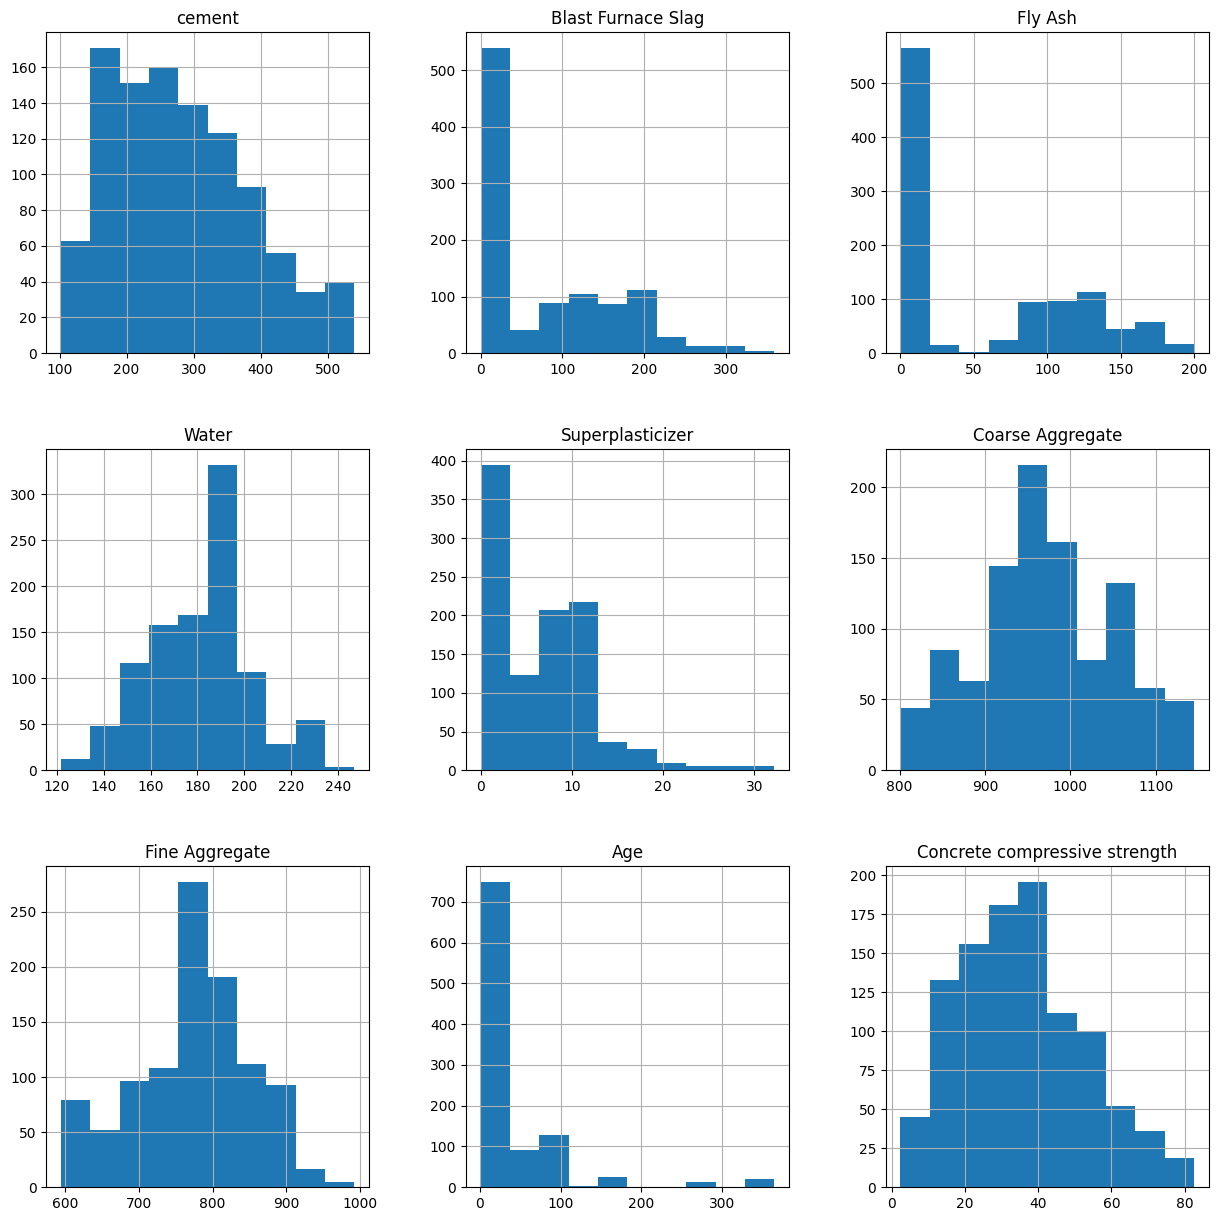

In [ ]:
data.hist(figsize=(15,15))

### Normalización de los datos

In [ ]:
def normalizar(x,xmax,xmin,ymax,ymin):
  m = (ymax-ymin)/(xmax-xmin)
  b = ymin - m*xmin

  y = m*x + b

  return y

In [ ]:
max = np.max(data)
min = np.min(data)
data2 = normalizar(data,max,min,1,0)
data2.head(10)

,cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,0.471616,0.000000,0.0,0.141485,0.002183,0.908297,0.590393,0.024454,0.069857
1,0.471616,0.000000,0.0,0.141485,0.002183,0.921397,0.590393,0.024454,0.054050
2,0.290393,0.124454,0.0,0.199127,0.000000,0.813974,0.518777,0.235808,0.035170
3,0.290393,0.124454,0.0,0.199127,0.000000,0.813974,0.518777,0.318777,0.035854
4,0.173450,0.115633,0.0,0.167686,0.000000,0.854498,0.720961,0.314410,0.038687
5,0.232314,0.099563,0.0,0.199127,0.000000,0.813974,0.585153,0.078603,0.041074
6,0.331878,0.082969,0.0,0.199127,0.000000,0.813974,0.518777,0.318777,0.038164
7,0.331878,0.082969,0.0,0.199127,0.000000,0.813974,0.518777,0.024454,0.031832
8,0.232314,0.099563,0.0,0.199127,0.000000,0.813974,0.585153,0.024454,0.040047
9,0.414847,0.000000,0.0,0.199127,0.000000,0.813974,0.518777,0.024454,0.034314


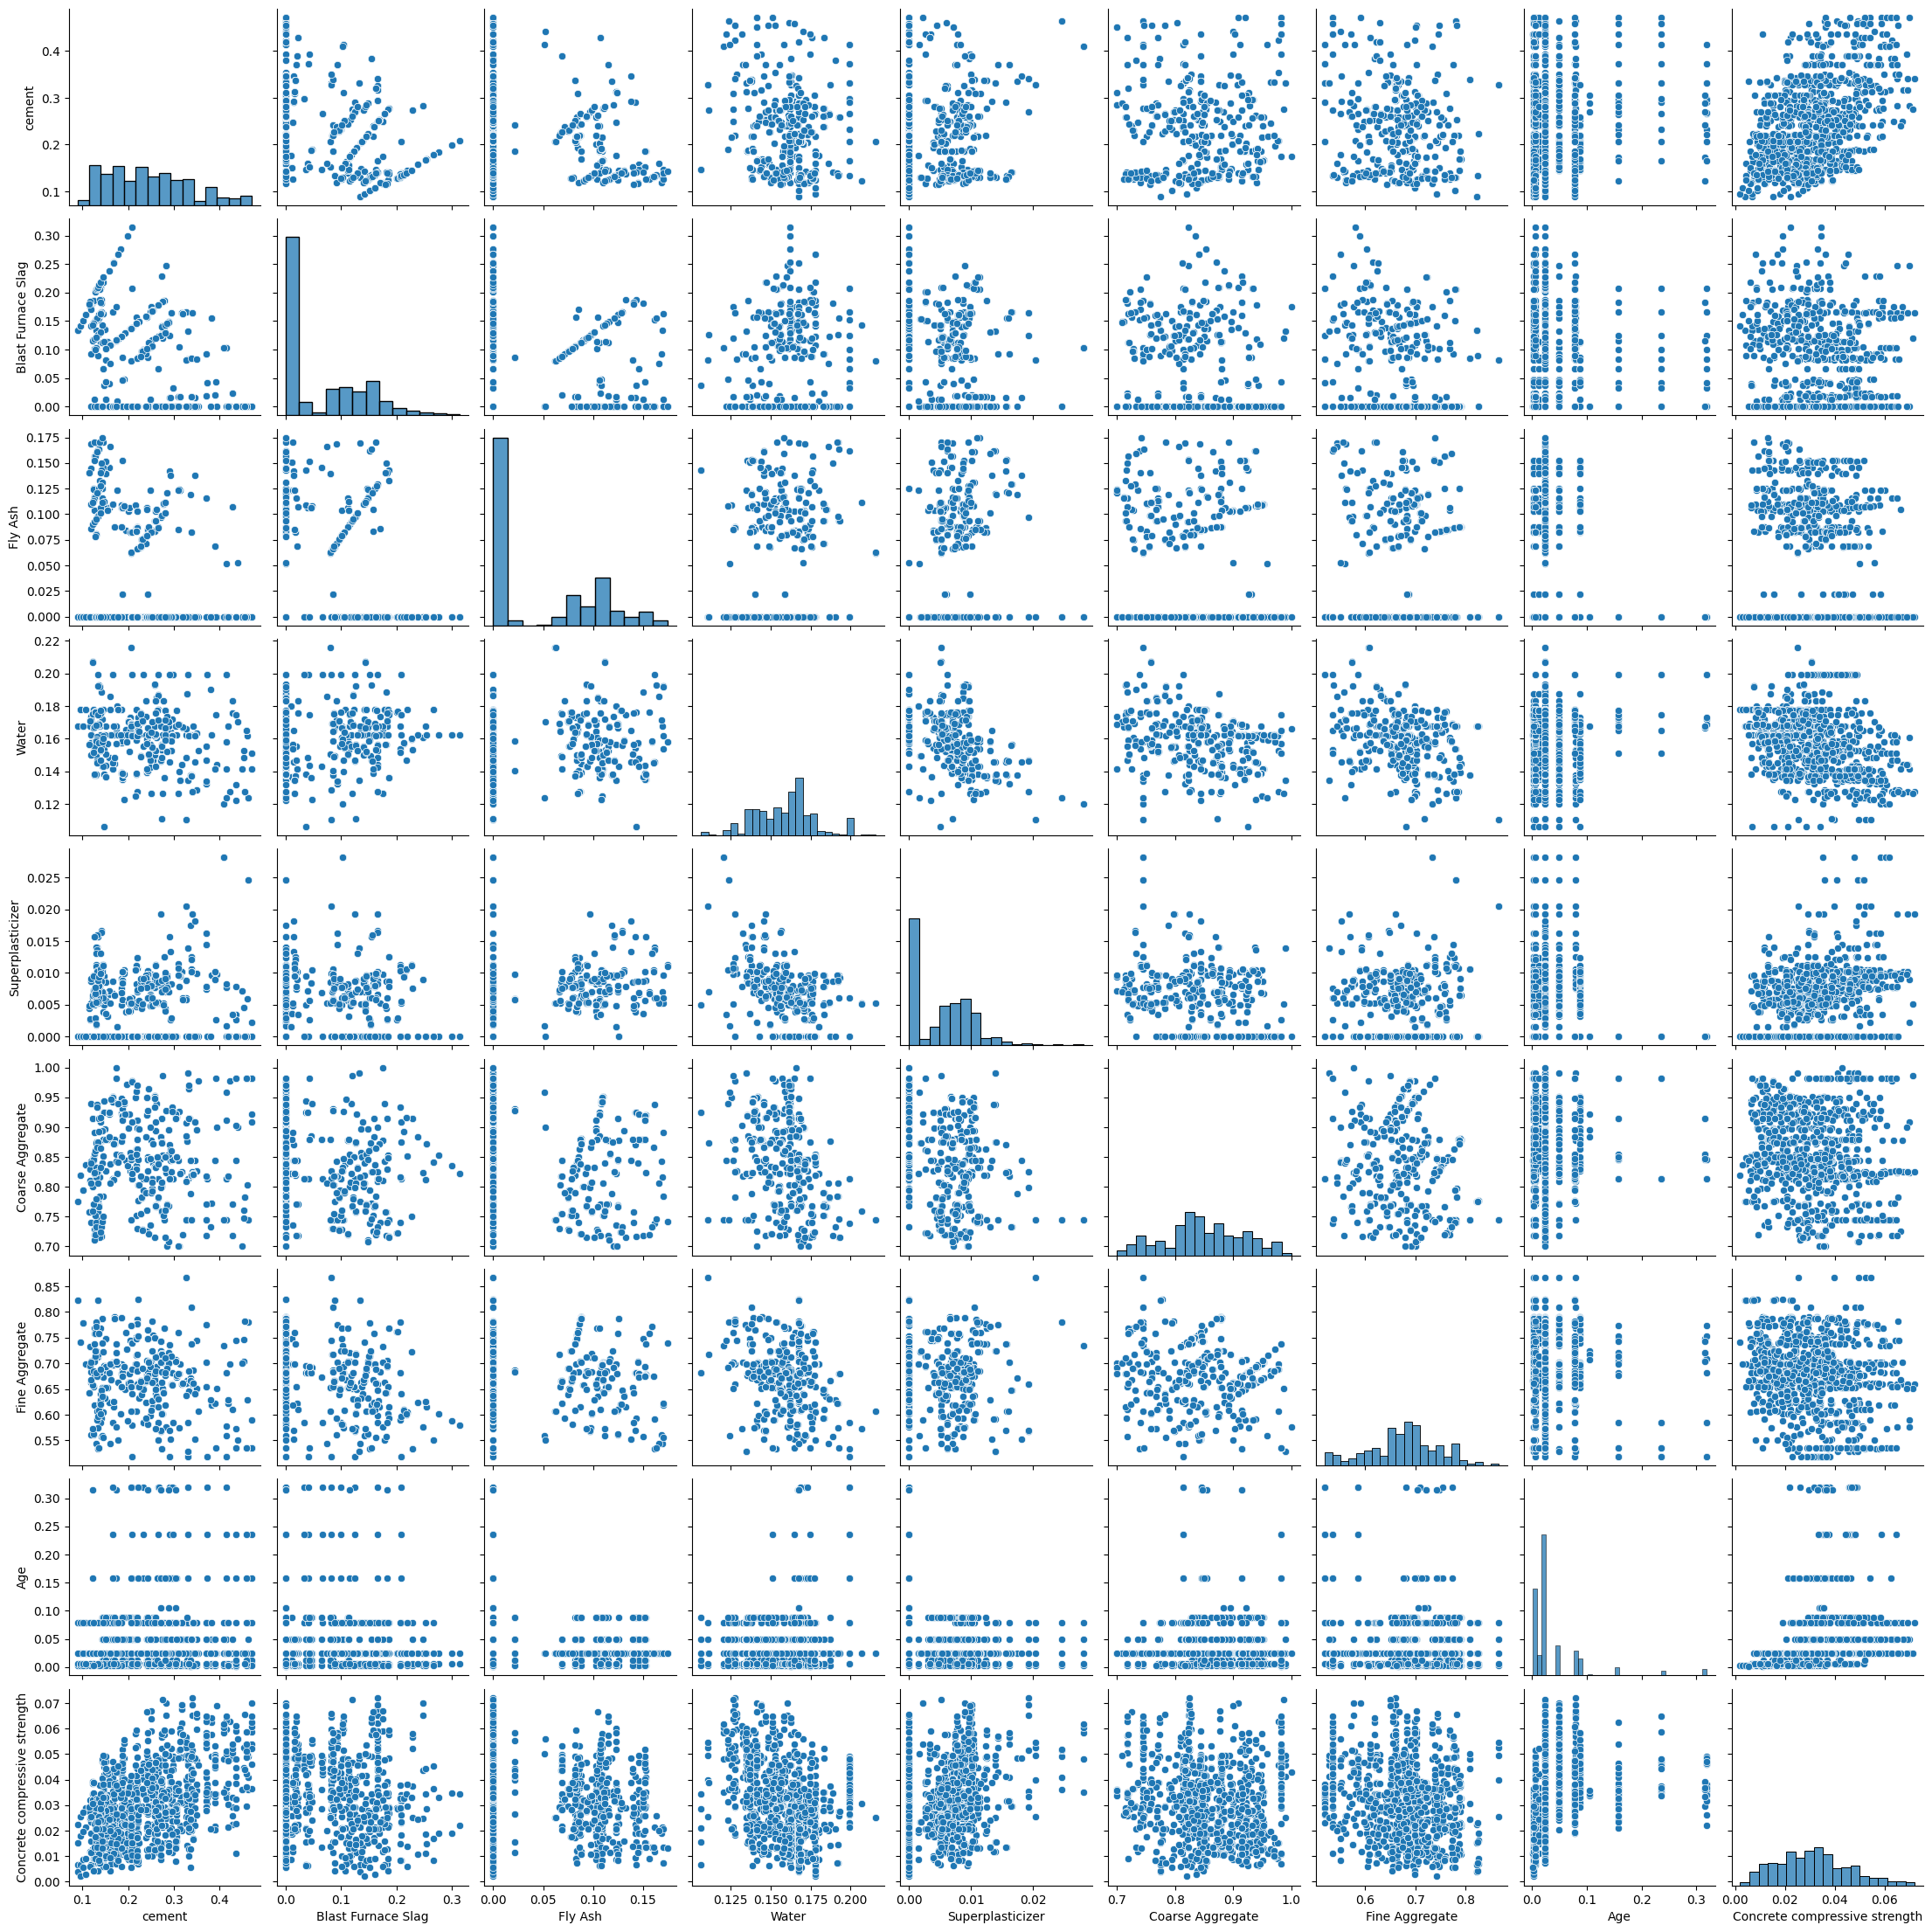

In [ ]:
sn.pairplot(data2)

In [ ]:
corr = data2.corr()
print(corr)

                                 cement  Blast Furnace Slag   Fly Ash  \
cement                         1.000000           -0.275193 -0.397475   
Blast Furnace Slag            -0.275193            1.000000 -0.323569   
Fly Ash                       -0.397475           -0.323569  1.000000   
Water                         -0.081544            0.107286 -0.257044   
Superplasticizer               0.092771            0.043376  0.377340   
Coarse Aggregate              -0.109356           -0.283998 -0.009977   
Fine Aggregate                -0.222720           -0.281593  0.079076   
Age                            0.081947           -0.044246 -0.154370   
Concrete compressive strength  0.497833            0.134824 -0.105753   

                                  Water  Superplasticizer  Coarse Aggregate  \
cement                        -0.081544          0.092771         -0.109356   
Blast Furnace Slag             0.107286          0.043376         -0.283998   
Fly Ash                       -0

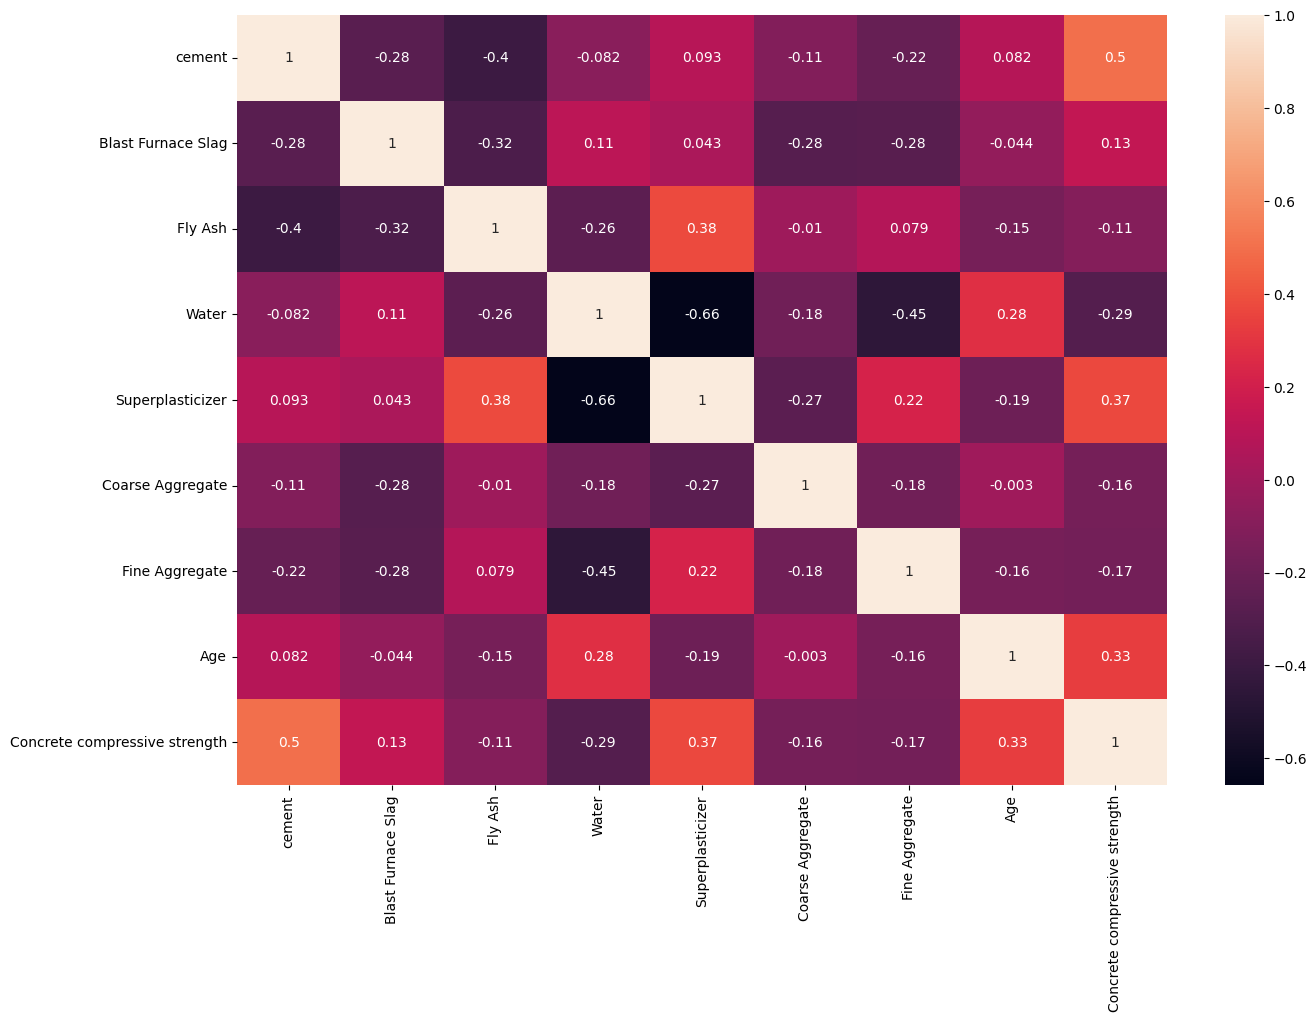

In [ ]:
plt.figure(figsize=(15,10))
sn.heatmap(corr, annot=True)
plt.show()

## Paso a paso para la creación del modelo MLP

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [ ]:
target = data2['Concrete compressive strength'].values#y_train
data3 = data2.drop(['Concrete compressive strength'], axis=1)

print(target.shape)
print(data3.shape)

(1030,)
(1030, 8)


### Separar datos de entrenamiento y validación

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42

x_train,x_test,y_train,y_test = train_test_split(data3, target, test_size=0.2, random_state=seed)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(824, 8)
(824,)
(206, 8)
(206,)


In [ ]:
input_dim = x_train.shape[1]
num_clases = 1
lr = 1e-3
EPOCHS = 800
loss = 'mse'#'mean_squared_error' para clasificación puede ser

### Crear arquitectura del modelo

In [ ]:
def model():
  model = Sequential()
  model.add(Dense(32, input_dim = input_dim, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.SGD(learning_rate=lr)

  model.compile(loss = loss, optimizer = opt)

  return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

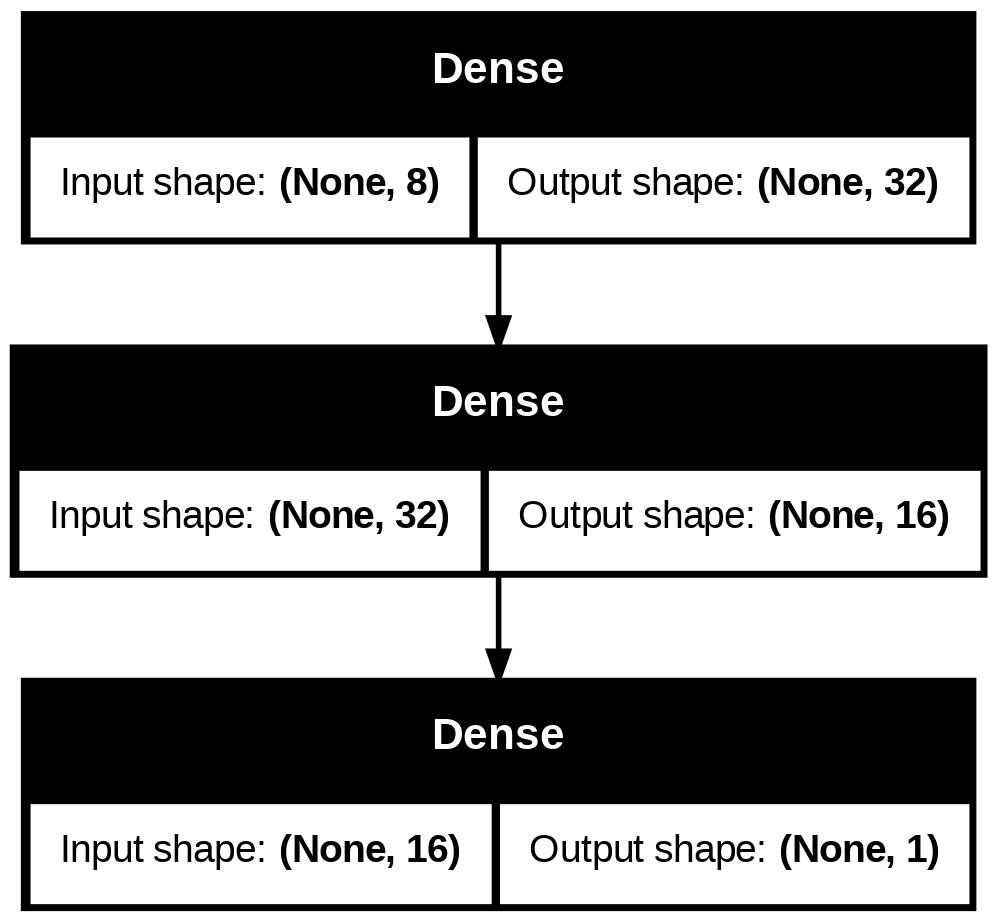

In [ ]:
model = model()
plot_model(model, to_file='model.jpg', show_shapes=True)

# Model

### Entrenar modelo

In [ ]:
loss = []
loss_val = []
epochs = 1

In [ ]:
# history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=1, batch_size=32, verbose=1)

# # plt.plot(history.history['loss'])
# # plt.plot(history.history['val_loss'])

# loss.append(history.history['loss'][0])
# loss_val.append(history.history['val_loss'][0])

# print('Epoch: ',epochs,'loss:',loss[epochs-1], 'val_loss:',loss_val[epochs-1])

# epochs += 1

while loss_val[len(loss_val)-1] > 0.000053: #  Se compara el varlo de la última posición de loss_val
  history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=1, batch_size=32, verbose=1)
  loss.append(history.history['loss'][0])
  loss_val.append(history.history['val_loss'][0])
  print('Epoch: ',epochs,'loss:',loss[epochs-1], 'val_loss:',loss_val[epochs-1])
  epochs += 1

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch:  7 loss: 0.0016485753003507853 val_loss: 0.0013494091108441353
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch:  8 loss: 0.0015506005147472024 val_loss: 0.0012644362868741155
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch:  9 loss: 0.0014815664617344737 val_loss: 0.0012025231262668967
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch:  10 loss: 0.001431287033483386 val_loss: 0.0011580806458368897
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch:  11 loss: 0.0013953500892966986 val_loss: 0.0011259689927101135
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch:  12 loss: 0.0013692735228687525 val_loss: 0.0011014173505827785
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch:  13 loss: 0.001349391182884574 val_loss: 0.00108313723467290

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print(score)

0.0008702054619789124


### Gráficar Epochs vs Loss

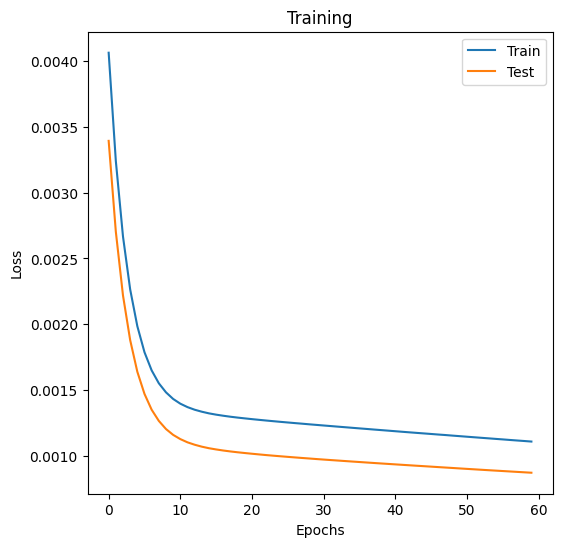

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(loss)
plt.plot(loss_val)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.title('Training')
plt.show()

In [ ]:
outputTest = model.predict(x_test)
print(outputTest.shape)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
(206, 1)


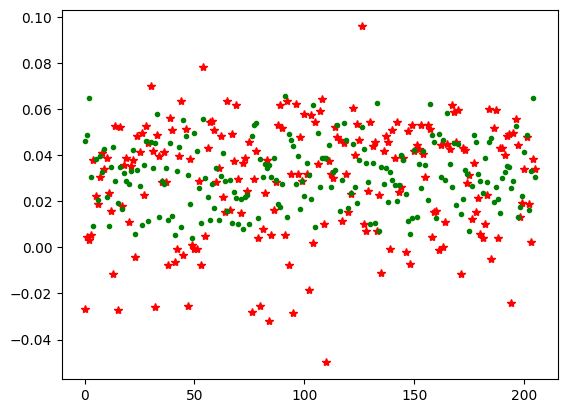

In [ ]:
plt.figure()
plt.plot(outputTest, '*r',y_test, '.g')

# Exploración de los pesos

In [ ]:
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Pesos de la capa {layer.name}:")
    print(weights)
    print(f"Biases de la capa {layer.name}:")
    print(biases)
    print("\n")

Pesos de la capa dense_6:
[[ 0.20517549 -0.26734474  0.2648259   0.25549555 -0.30556086  0.05338171
  -0.28993025  0.23791826 -0.06533176 -0.34573257  0.28219908  0.35192078
   0.24633831  0.3860199   0.01013386 -0.011006    0.37019643  0.1579673
  -0.16675143  0.17794679  0.17159738  0.15434024 -0.22743966  0.38654137
   0.16698025  0.34170377 -0.23899075  0.10827565  0.15031195 -0.07270283
   0.28343552  0.3733089 ]
 [-0.24987598  0.09078357 -0.2509326  -0.3271529   0.04466018  0.01611984
  -0.0133031  -0.23854993 -0.16972305  0.00590942  0.24264377  0.29554337
   0.32598764 -0.2276707  -0.22674361 -0.17007463  0.26183158 -0.27989504
  -0.09023914  0.31834957  0.15367308  0.08416776 -0.08246034 -0.1469134
  -0.3834861  -0.10232818  0.3418122  -0.02819389 -0.07705939  0.29221407
  -0.3759433   0.11827457]
 [ 0.18718517 -0.05061948  0.33207682 -0.12556727  0.18044835 -0.08257011
  -0.19461642 -0.09433424 -0.21729146 -0.05968233  0.10687506 -0.21078832
   0.275037   -0.08218475 -0.09074

# **Problema de clasificación**

El one-hot encoding es una técnica utilizada en el preprocesamiento de datos para convertir variables categóricas en un formato numérico que puede ser utilizado por algoritmos de aprendizaje automático. En lugar de asignar números enteros a cada categoría (lo que podría introducir un orden arbitrario entre las categorías), el one-hot encoding crea una columna binaria (0 o 1) para cada categoría posible de la variable. Para cada muestra, se coloca un "1" en la columna correspondiente a su categoría y "0" en las demás.


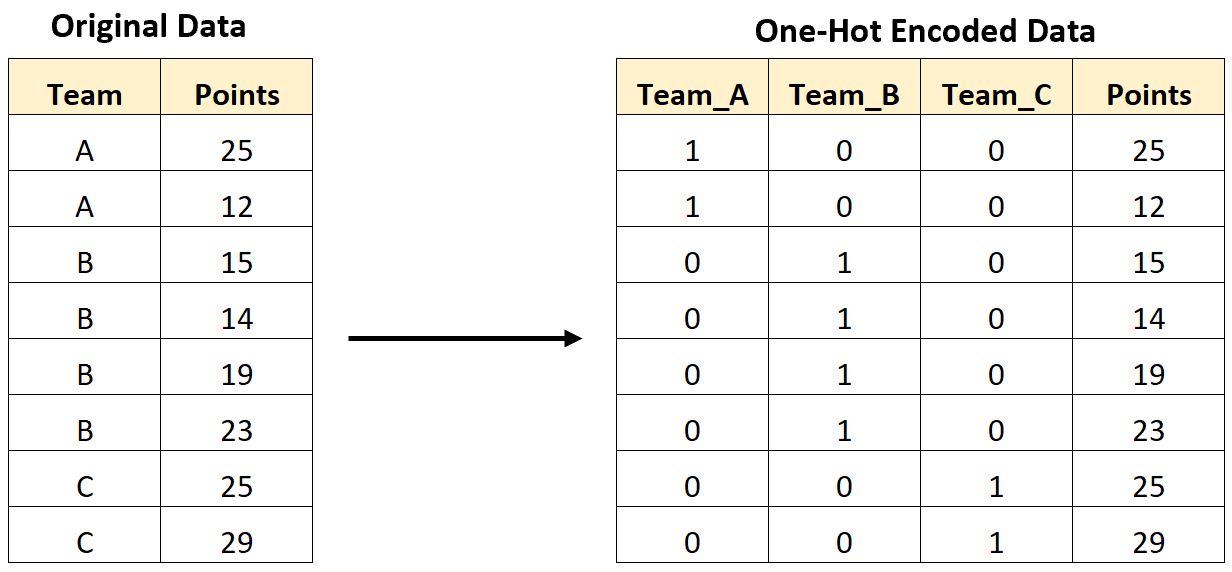


En la imagen anterior, se muestra un ejemplo de cómo se aplica el one-hot encoding. A la izquierda, tenemos los datos originales, donde la columna "Team" representa el equipo (A, B o C) y la columna "Points" muestra los puntos obtenidos por ese equipo. Después de aplicar el one-hot encoding, el conjunto de datos se transforma en lo que vemos a la derecha: la columna "Team" ha sido reemplazada por tres nuevas columnas ("Team_A", "Team_B", "Team_C"), cada una indicando la pertenencia de un equipo mediante un 1 en la columna correspondiente y un 0 en las demás. Por ejemplo, si el equipo es "A", la columna "Team_A" tendrá un 1, y "Team_B" y "Team_C" tendrán 0.

Este método es esencial cuando se trabaja con algoritmos que no pueden manejar directamente datos categóricos, permitiendo que estas variables sean interpretadas correctamente en el proceso de aprendizaje.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Etiquetas

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos (escalado)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir las etiquetas a formato one-hot
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)


Las funciones de pérdida en clasificación, como binary_crossentropy, categorical_crossentropy y sparse_categorical_crossentropy, están intrínsecamente relacionadas con la estructura de la capa de salida de la red neuronal, ya que la combinación correcta asegura que el modelo pueda aprender de manera efectiva.



**Binary Crossentropy (binary_crossentropy):**

*   Capa de salida: En problemas de clasificación binaria, la capa de salida debe tener una única neurona. Esta neurona utiliza una activación sigmoide, que convierte la salida en un valor de probabilidad entre 0 y 1, representando la probabilidad de pertenecer a la clase positiva.
*   Función de pérdida: binary_crossentropy mide la discrepancia entre la etiqueta real (0 o 1) y la probabilidad predicha por la capa de salida. Es adecuada para problemas donde hay solo dos clases.

**Categorical Crossentropy (categorical_crossentropy):**

*   Capa de salida: Para problemas de clasificación multiclase, la capa de salida debe tener tantas neuronas como clases. Por ejemplo, si hay 3 clases, la capa de salida tendrá 3 neuronas. Esta capa de salida utiliza una activación softmax, que convierte las salidas en probabilidades que suman a 1, asignando una probabilidad a cada clase.
*   unción de pérdida: categorical_crossentropy se usa cuando las etiquetas están en formato one-hot. La función compara la distribución de probabilidad predicha por el modelo (generada por la activación softmax) con la distribución one-hot de las etiquetas reales.

**Sparse Categorical Crossentropy (sparse_categorical_crossentropy**):

*   Capa de salida: Al igual que con categorical_crossentropy, la capa de salida debe tener una neurona por clase y utilizar una activación softmax. Esta configuración es idéntica a la utilizada para categorical_crossentropy.
*   Función de pérdida: sparse_categorical_crossentropy es adecuada cuando las etiquetas están representadas como números enteros en lugar de vectores one-hot. Cada etiqueta es un entero que indica la clase correcta. La función de pérdida se encarga de convertir este entero en un formato que se puede comparar con la distribución de probabilidades generada por la softmax.

In [ ]:
# Crear un modelo secuencial
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # Capa oculta con 64 neuronas y activación ReLU
    Dense(32, activation='relu'),                    # Otra capa oculta con 32 neuronas y activación ReLU
    Dense(3, activation='softmax')                   # Capa de salida con 3 neuronas (una para cada clase) y activación softmax
])

# Compilar el modelo usando 'categorical_crossentropy' para clasificación multiclase
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 295ms/step - accuracy: 0.1173 - loss: 1.1379 - val_accuracy: 0.1667 - val_loss: 1.0782
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4479 - loss: 1.0403 - val_accuracy: 0.7083 - val_loss: 0.9856
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7567 - loss: 0.9512 - val_accuracy: 0.7917 - val_loss: 0.8977
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7854 - loss: 0.8698 - val_accuracy: 0.8333 - val_loss: 0.8147
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7859 - loss: 0.7740 - val_accuracy: 0.8333 - val_loss: 0.7378
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8132 - loss: 0.7015 - val_accuracy: 0.8333 - val_loss: 0.6703
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7299 - loss: 0.6758 - val_accuracy: 0.8333 - val_loss: 0.6128
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7510 - loss: 0.5991 - val_accuracy: 0.8333 - val_loss: 0.5605

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0727
Precisión en el conjunto de prueba: 1.0
